In [0]:
%pip install -U langchain==0.3.2 langchain-experimental==0.3.2 langgraph==0.2.34 langchain-databricks==0.1.0 datasets==3.0.2 tavily-python==0.5.0 wikipedia==1.4.0

dbutils.library.restartPython()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.1/208.1 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.9/296.9 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.0/408.0 kB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 751.2/751.2 kB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [0]:
from dotenv import load_dotenv

load_dotenv()

True

In [0]:
from avengers import avengers_graph as graph

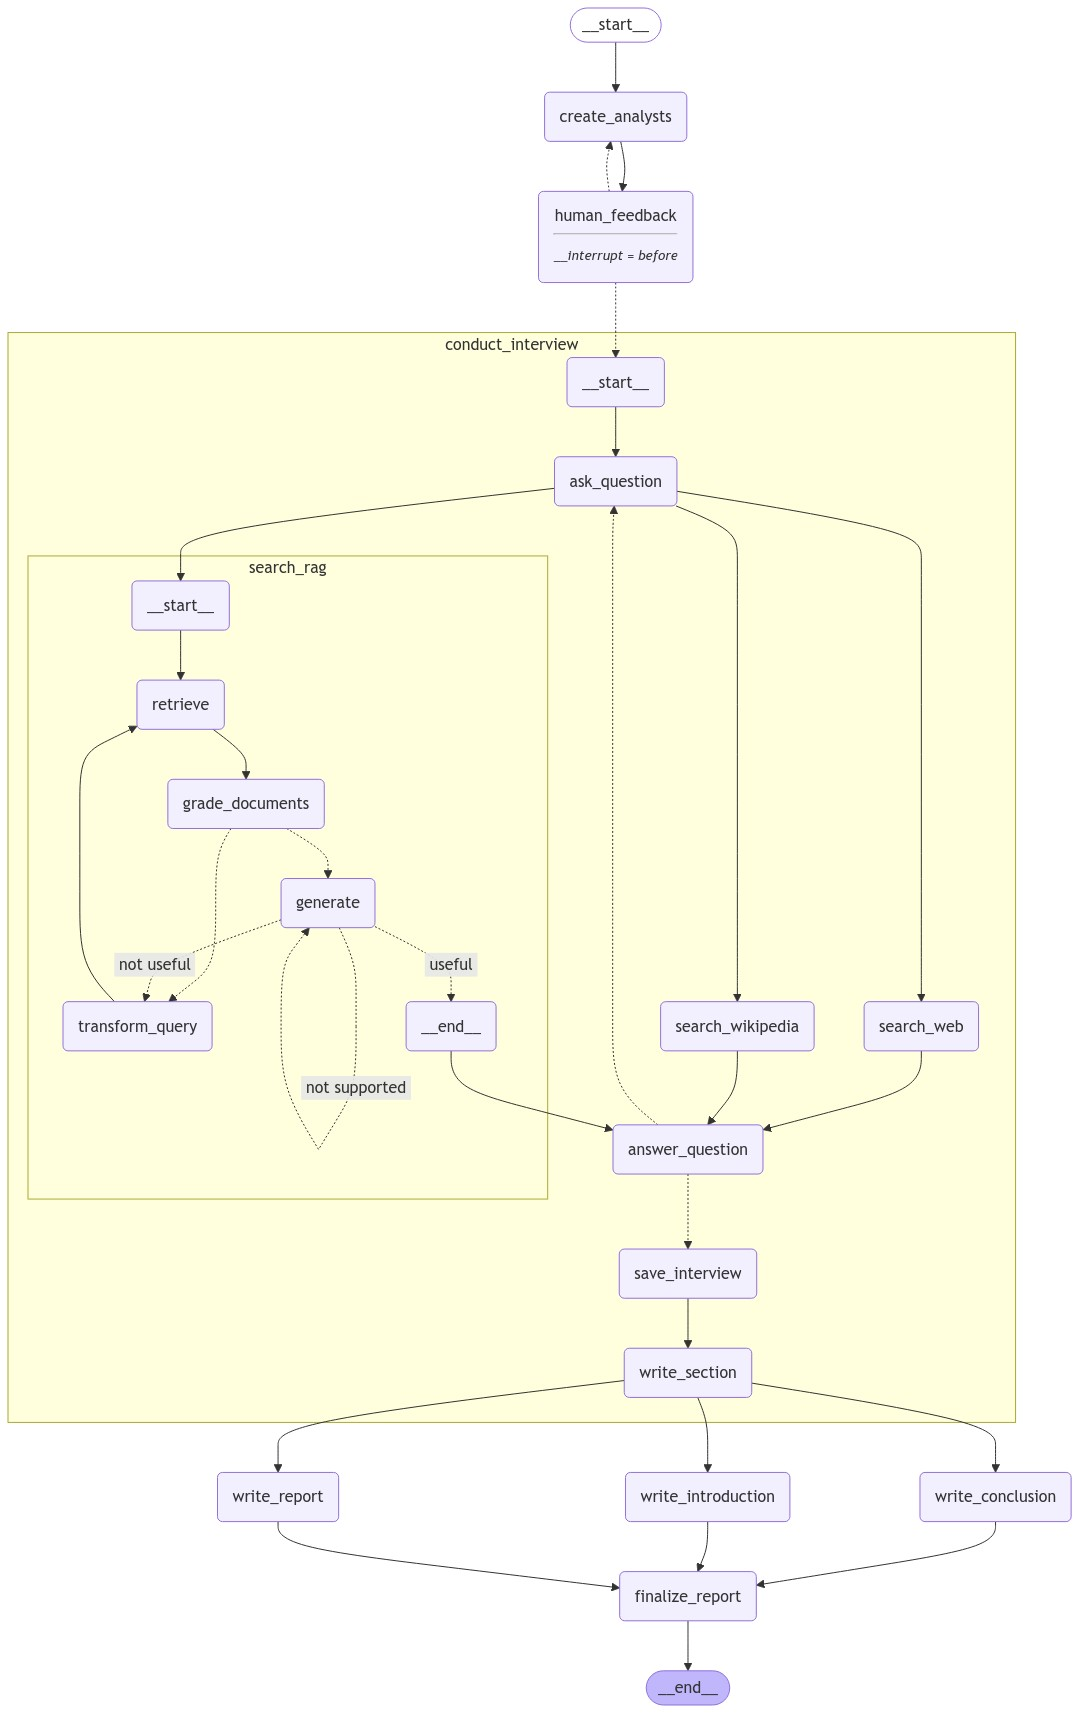

In [0]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [0]:
import mlflow
mlflow.langchain.autolog()

In [0]:
# Inputs
max_analysts = 3
topic = "Exploring Mental Health Stigma Among Youth: Causes, Effects, and Reduction Strategies"
thread = {"configurable": {"thread_id": "2"}}

# Run the graph until the first interruption
for event in graph.stream({"topic":topic,
                           "max_analysts":max_analysts}, 
                          thread, 
                          stream_mode="values"):
    
    analysts = event.get('analysts', '')
    if analysts:
        for analyst in analysts:
            print(f"Name: {analyst['name']}")
            print(f"Affiliation: {analyst['affiliation']}")
            print(f"Role: {analyst['role']}")
            print(f"Description: {analyst['description']}")
            print("-" * 50)
        print("#" * 100)

Name: Dr. Jane Smith
Affiliation: Harvard University
Role: Mental Health Specialist
Description: Dr. Smith is a leading expert in adolescent mental health, focusing on the causes and effects of stigma among youth. She has published numerous papers on the topic and is a strong advocate for reducing stigma through education and awareness.
--------------------------------------------------
Name: Dr. John Doe
Affiliation: Stanford University
Role: Social Psychologist
Description: Dr. Doe's research focuses on the social and cultural factors that contribute to mental health stigma among young people. He is particularly interested in exploring the role of social media in perpetuating stigma and developing strategies to mitigate its effects.
--------------------------------------------------
Name: Dr. Maria Rodriguez
Affiliation: University of California, Los Angeles
Role: Clinical Psychologist
Description: Dr. Rodriguez has extensive experience working with adolescents and young adults strug

Trace(request_id=tr-86b24b0dea6f4cbf9eed2cfe674ac0d5)

In [0]:
# We now update the state as if we are the human_feedback node
graph.update_state(thread, {"human_analyst_feedback": 
                                "Add in the profesionals in public media sector"}, as_node="human_feedback") 

{'configurable': {'thread_id': '2',
  'checkpoint_ns': '',
  'checkpoint_id': '1ef95d53-2950-68b2-8002-2582fb22baaf'}}

Trace(request_id=tr-e14856eb349f4eb9910d8751cf9ebd61)

In [0]:
# Check
for event in graph.stream(None, thread, stream_mode="values"):
    # Review
    analysts = event.get('analysts', '')
    if analysts:
        for analyst in analysts:
            print(f"Name: {analyst['name']}")
            print(f"Affiliation: {analyst['affiliation']}")
            print(f"Role: {analyst['role']}")
            print(f"Description: {analyst['description']}")
            print("-" * 50)
        print("#" * 100)

Name: Dr. Jane Smith
Affiliation: Harvard University
Role: Mental Health Specialist
Description: Dr. Smith is a leading expert in adolescent mental health, focusing on the causes and effects of stigma among youth. She has published numerous papers on the topic and is a strong advocate for reducing stigma through education and awareness.
--------------------------------------------------
Name: Dr. John Doe
Affiliation: Stanford University
Role: Social Psychologist
Description: Dr. Doe's research focuses on the social and cultural factors that contribute to mental health stigma among young people. He is particularly interested in exploring the role of social media in perpetuating stigma and developing strategies to mitigate its effects.
--------------------------------------------------
Name: Dr. Maria Rodriguez
Affiliation: University of California, Los Angeles
Role: Clinical Psychologist
Description: Dr. Rodriguez has extensive experience working with adolescents and young adults strug

Trace(request_id=tr-c741a2a2f8d340039f5e3161b89835b7)

In [0]:
# Confirm we are happy
graph.update_state(thread, {"human_analyst_feedback": 
                            None}, as_node="human_feedback")

{'configurable': {'thread_id': '2',
  'checkpoint_ns': '',
  'checkpoint_id': '1ef95d53-a3ec-609e-8004-ca7393b66bbd'}}

Trace(request_id=tr-3942e5f314204ad49d4a8e321e525dec)

In [0]:
# Continue
for event in graph.stream(None, thread, stream_mode="updates"):
    print("--Node--")
    node_name = next(iter(event.keys()))
    print(node_name)

---RETRIEVE---
---CHECK DOCUMENT RELEVANCE TO QUESTION---
---RETRIEVE---
---CHECK DOCUMENT RELEVANCE TO QUESTION---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT NOT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT NOT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
---ASSESS GRADED DOCUMENTS---
---DECISION: GENERATE---
---GENERATE---
---GRADE: DOCUMENT RELEVANT---
---RETRIEVE---
---CHECK DOCUMENT RELEVANCE TO QUESTION---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
---CHECK HALLUCINATIONS---
---DECISION: GENERATION IS GROUNDED IN DOCUMENTS---
---GRADE GENERATION vs QUESTION---
---GRADE: DOCUMENT RELEVANT---
---ASSESS GRADED DOCUMENTS---
---DECISION: GENERATE---
---GENERATE---
---GRADE: DOCUMENT RELEVANT---
---DECISION: GENERATION ADDRESSES QUESTION---
---GRADE: DOCUMENT RELEVANT---
---CHECK HALLUCINATIONS---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
---ASSESS GRADED DOCUMENTS

Trace(request_id=tr-0bb05edecf7e497b8c5681127ac6a7a8)

In [0]:
from IPython.display import Markdown
final_state = graph.get_state(thread)
report = final_state.values.get('final_report')
Markdown(report)

# Breaking the Stigma: Addressing Mental Health in Youth

## Introduction

Mental health stigma is a pervasive and debilitating barrier that prevents many young people from seeking help for mental health issues. The consequences of stigma can be severe, exacerbating mental health conditions, reducing quality of life, and inhibiting help-seeking behavior. This report explores the complex causes and effects of mental health stigma among youth, including the disproportionate impact on vulnerable populations such as LGBTQ+ youth. It also examines the effectiveness of various reduction strategies, including education, contact, and media campaigns, and highlights the importance of cultural sensitivity and awareness-raising efforts in promoting mental health literacy and non-discriminatory attitudes. By synthesizing the findings of recent research and identifying best practices, this report aims to inform the development of targeted interventions and support the creation of a more inclusive and supportive environment for young people to seek help and thrive.

---



Mental health stigma is a significant barrier to seeking help for mental health issues, particularly among young people. Research has consistently shown that experiencing mental health stigma during adolescence can exacerbate mental health conditions, reduce quality of life, and inhibit help-seeking behavior. The prevalence of mental health stigma is higher among young people than in the general population, with certain groups, such as LGBTQ+ youth, being disproportionately affected.

Education and contact have been identified as suitable approaches for stigma reduction, but evidence on the effectiveness of these interventions is limited. However, studies have shown that promoting mental health literacy, non-discriminatory attitudes, and reducing stigmatizing behaviors can have positive effects. Media campaigns have also been found to be effective in reducing mental health stigma by promoting positive attitudes and behaviors towards mental health.

The impact of mental health stigma can vary depending on the population and context. Young people and rural residents tend to show more positive attitudes towards mental disorders compared to older people and urban residents. People with higher education levels and those who have contact with people with mental disorders have higher mental health knowledge and more positive attitudes towards mental disorders.

Social media has been identified as a significant contributor to mental health stigma, with online harassment, cyberbullying, and social comparison leading to increased symptoms of depression and anxiety. However, social media-based interventions that promote positive mental health messages and online support groups can help mitigate the negative effects of social media on mental health.

To address mental health stigma, it is essential to promote education, advocacy, and awareness-raising efforts. This can include initiatives such as mental health campaigns, educational programs, and personal accounts of individuals who have overcome mental health stigma. Interventions that promote mental health literacy, non-discriminatory attitudes, and help-seeking behaviors have shown promise in reducing stigma and improving mental health outcomes.

Overall, reducing mental health stigma among young people requires a multi-faceted approach that involves education, awareness-raising, and social support. By working together to break the stigma surrounding mental health, we can create a more supportive and inclusive environment for young people to seek help and thrive.


---

## Conclusion

Mental health stigma is a pervasive and debilitating issue that affects young people worldwide, exacerbating mental health conditions, reducing quality of life, and inhibiting help-seeking behavior. This report has highlighted the causes and effects of mental health stigma among youth, as well as potential strategies for reduction. Key findings emphasize the importance of education, awareness-raising, and social support in promoting mental health literacy, non-discriminatory attitudes, and help-seeking behaviors. Media campaigns, social media-based interventions, and targeted approaches for specific populations, such as LGBTQ+ youth, have shown promise in reducing stigma and improving mental health outcomes. Ultimately, a multi-faceted approach that involves individuals, communities, and societies is necessary to break the stigma surrounding mental health and create a more supportive and inclusive environment for young people to thrive.

## Sources

[1] https://psycnet.apa.org/record/2023-96455-001
[2] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10579682/
[3] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10579682/
[4] https://en.wikipedia.org/wiki/Suicide_among_LGBTQ_youth
[5] https://en.wikipedia.org/wiki/Mental_health
[6] <Document source="pmid/32488826" />
[7] https://www.park.edu/blog/mental-health-awareness-breaking-the-stigma-with-education-and-advocacy/
[8] https://www.cambridge.org/core/services/aop-cambridge-core/content/view/3B593DF536D67DF47701B3B4CEA74639/S2054425123000341a.pdf
[9] https://www.ncbi.nlm.nih.gov/books/NBK384914/
[10] pmid/30453932
[11] pmid/28198022
[12] Attitudes About Mental Illness Among Seminary Students: a Qualitative Analysis. (2020). PMID: 32488826
[13] Evaluation of attitudes and knowledge toward mental disorders in a sample of the Chinese population using a web-based approach. (2018). PMID: 30453932
[14] Suicide among LGBTQ youth. (2023). Wikipedia.
[15] The Potential Harms of Social Media Use Among Children and Adolescents. (2021). National Center for Biotechnology Information.
[16] Protecting teens on social media. (2023). American Psychological Association.
[17] The effectiveness of anti-stigma interventions for reducing mental health stigma in young people: A systematic review and meta-analysis. (2022). National Center for Biotechnology Information.
[18] Social media-based and other digitally-based mental health interventions may also be helpful for some children and adolescents by promoting help-seeking behaviors and serving as a gateway to initiating mental health care. (2021). National Center for Biotechnology Information.